In [14]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

PROCESSED = Path("../data/processed")

# Load enriched datasets
df_data = pd.read_csv(PROCESSED / "ethiopia_fi_enriched.csv", parse_dates=["observation_date", "collection_date"])
df_links = pd.read_csv(PROCESSED / "impact_links_enriched.csv", parse_dates=["collection_date"])

print("Data loaded successfully")
print(df_data.head())
print(df_links.head())


Data loaded successfully
  record_id  record_type category  pillar               indicator  \
0  REC_0001  observation      NaN  ACCESS  Account Ownership Rate   
1  REC_0002  observation      NaN  ACCESS  Account Ownership Rate   
2  REC_0003  observation      NaN  ACCESS  Account Ownership Rate   
3  REC_0004  observation      NaN  ACCESS  Account Ownership Rate   
4  REC_0005  observation      NaN  ACCESS  Account Ownership Rate   

  indicator_code indicator_direction  value_numeric value_text  value_type  \
0  ACC_OWNERSHIP       higher_better           22.0        NaN  percentage   
1  ACC_OWNERSHIP       higher_better           35.0        NaN  percentage   
2  ACC_OWNERSHIP       higher_better           46.0        NaN  percentage   
3  ACC_OWNERSHIP       higher_better           56.0        NaN  percentage   
4  ACC_OWNERSHIP       higher_better           36.0        NaN  percentage   

   ... impact_direction impact_magnitude impact_estimate lag_months  \
0  ...              

In [4]:
print(df_data['record_type'].value_counts())
print(df_data['pillar'].value_counts(dropna=False))
print(df_data['source_type'].value_counts(dropna=False))


record_type
observation    31
event          11
target          3
Name: count, dtype: int64
pillar
ACCESS           17
USAGE            11
NaN              11
GENDER            5
AFFORDABILITY     1
Name: count, dtype: int64
source_type
operator      15
survey        10
regulator      7
research       4
policy         3
calculated     2
news           2
report         2
Name: count, dtype: int64


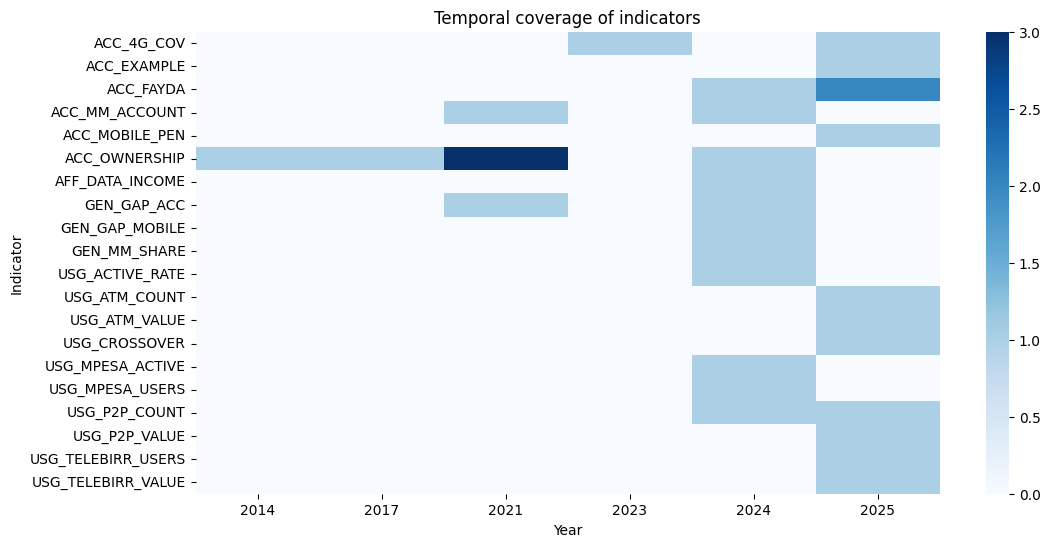

In [15]:
# Extract year
df_data['year'] = df_data['observation_date'].dt.year

# Count of observations per indicator per year
indicator_year = df_data[df_data['record_type'] == 'observation'].groupby(['year','indicator_code']).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(indicator_year.T, cmap="Blues", cbar=True)
plt.title("Temporal coverage of indicators")
plt.xlabel("Year")
plt.ylabel("Indicator")
plt.show()


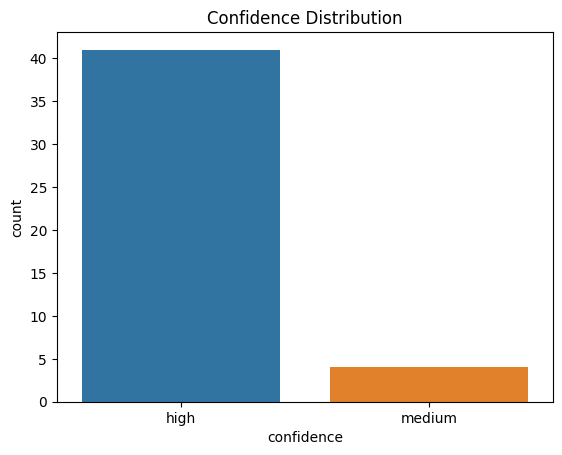

Indicators with sparse coverage (<=2 records):
indicator_code
ACC_4G_COV            2
ACC_EXAMPLE           1
ACC_MM_ACCOUNT        2
ACC_MOBILE_PEN        1
AFF_DATA_INCOME       1
GEN_GAP_ACC           2
GEN_GAP_MOBILE        1
GEN_MM_SHARE          1
USG_ACTIVE_RATE       1
USG_ATM_COUNT         1
USG_ATM_VALUE         1
USG_CROSSOVER         1
USG_MPESA_ACTIVE      1
USG_MPESA_USERS       1
USG_P2P_COUNT         2
USG_P2P_VALUE         1
USG_TELEBIRR_USERS    1
USG_TELEBIRR_VALUE    1
Name: value_numeric, dtype: int64


In [6]:
sns.countplot(data=df_data, x='confidence')
plt.title("Confidence Distribution")
plt.show()

# Indicators with sparse coverage
obs_count = df_data[df_data['record_type']=='observation'].groupby('indicator_code')['value_numeric'].count()
print("Indicators with sparse coverage (<=2 records):")
print(obs_count[obs_count <= 2])


/home/hanix/10academy/ethiopia-fi-forecast/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/hanix/10academy/ethiopia-fi-forecast/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


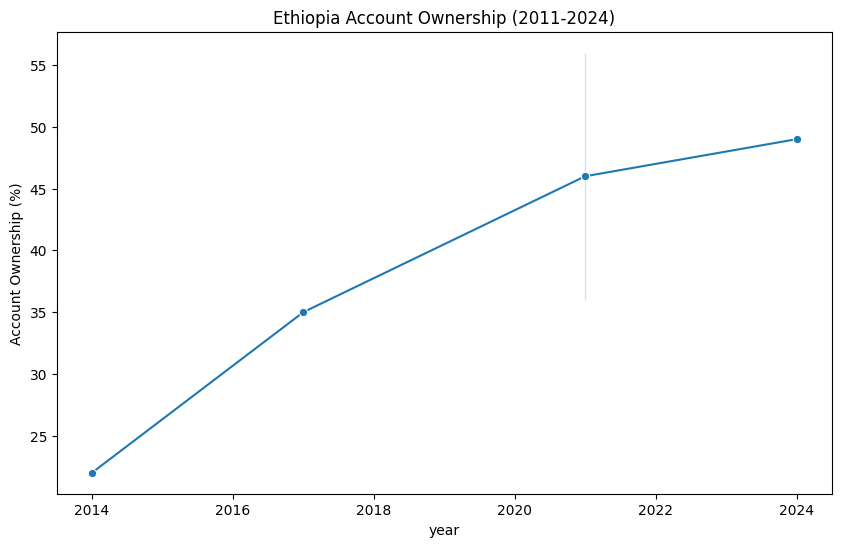

In [7]:
access_obs = df_data[(df_data['record_type']=='observation') & (df_data['pillar']=='ACCESS') & (df_data['indicator_code']=='ACC_OWNERSHIP')]
plt.figure(figsize=(10,6))
sns.lineplot(data=access_obs, x='year', y='value_numeric', marker='o')
plt.title("Ethiopia Account Ownership (2011-2024)")
plt.ylabel("Account Ownership (%)")
plt.show()


In [8]:
access_obs = access_obs.sort_values('observation_date')
access_obs['growth_pp'] = access_obs['value_numeric'].diff()
print(access_obs[['observation_date','value_numeric','growth_pp']])


  observation_date  value_numeric  growth_pp
0       2014-12-31           22.0        NaN
1       2017-12-31           35.0       13.0
2       2021-12-31           46.0       11.0
3       2021-12-31           56.0       10.0
4       2021-12-31           36.0      -20.0
5       2024-11-29           49.0       13.0


/home/hanix/10academy/ethiopia-fi-forecast/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/hanix/10academy/ethiopia-fi-forecast/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/hanix/10academy/ethiopia-fi-forecast/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hanix/10academy/ethiopia-fi-forecast/.venv/l

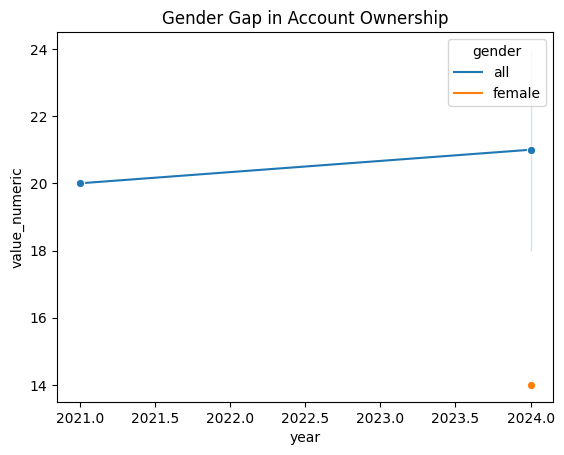

In [9]:
gender_obs = df_data[(df_data['record_type']=='observation') & (df_data['pillar']=='GENDER')]
sns.lineplot(data=gender_obs, x='year', y='value_numeric', hue='gender', marker='o')
plt.title("Gender Gap in Account Ownership")
plt.show()


/home/hanix/10academy/ethiopia-fi-forecast/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/hanix/10academy/ethiopia-fi-forecast/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/hanix/10academy/ethiopia-fi-forecast/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hanix/10academy/ethiopia-fi-forecast/.venv/l

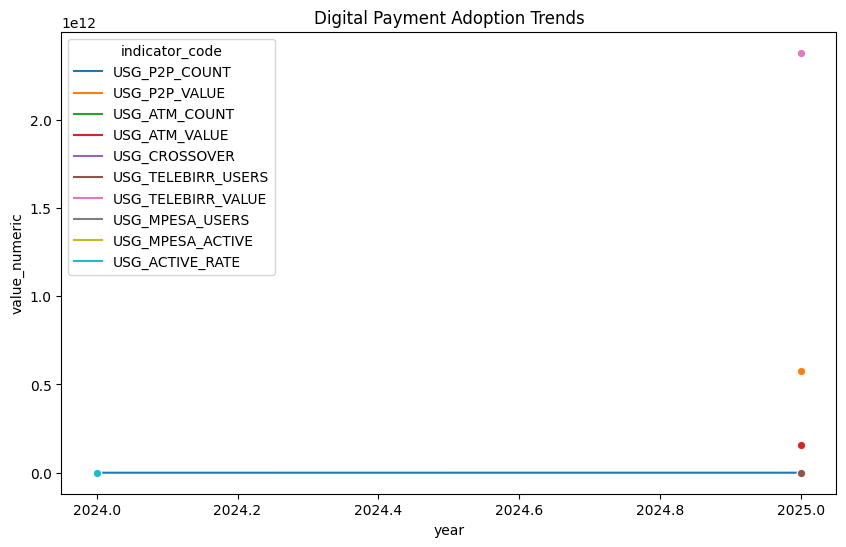

In [10]:
usage_obs = df_data[(df_data['record_type']=='observation') & (df_data['pillar']=='USAGE')]
plt.figure(figsize=(10,6))
sns.lineplot(data=usage_obs, x='year', y='value_numeric', hue='indicator_code', marker='o')
plt.title("Digital Payment Adoption Trends")
plt.show()


/home/hanix/10academy/ethiopia-fi-forecast/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/hanix/10academy/ethiopia-fi-forecast/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/hanix/10academy/ethiopia-fi-forecast/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hanix/10academy/ethiopia-fi-forecast/.venv/l

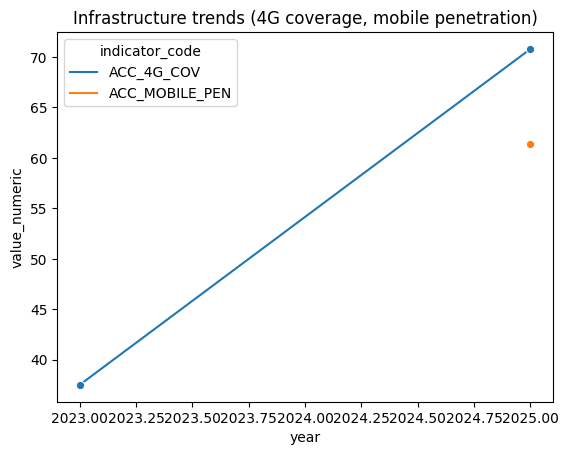

In [11]:
infra_obs = df_data[(df_data['record_type']=='observation') & (df_data['pillar']=='ACCESS') & df_data['indicator_code'].str.contains('4G|MOBILE')]
sns.lineplot(data=infra_obs, x='year', y='value_numeric', hue='indicator_code', marker='o')
plt.title("Infrastructure trends (4G coverage, mobile penetration)")
plt.show()


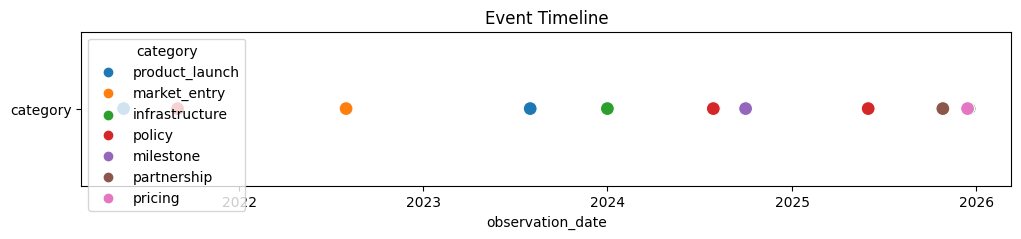

/home/hanix/10academy/ethiopia-fi-forecast/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/hanix/10academy/ethiopia-fi-forecast/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


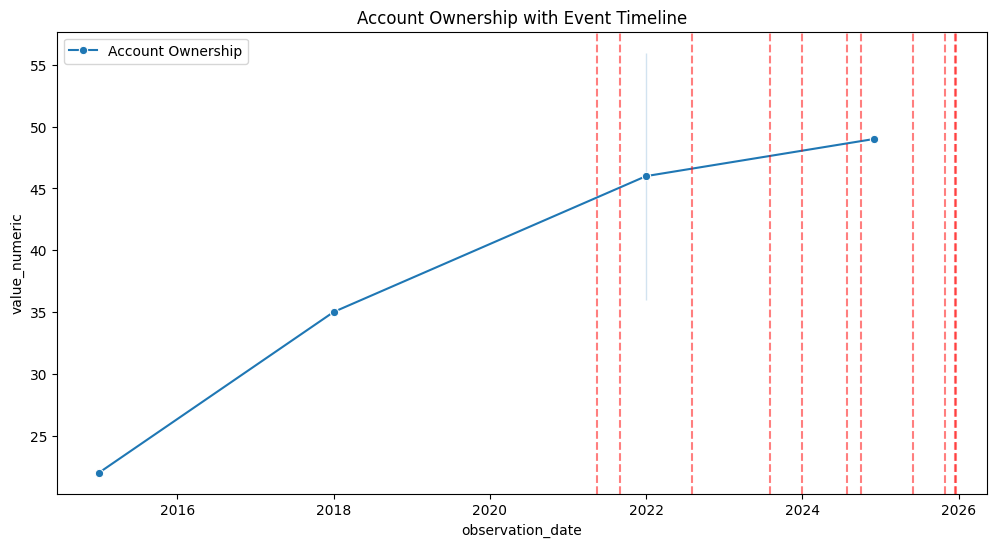

In [12]:
events = df_data[df_data['record_type']=='event']
plt.figure(figsize=(12,2))
sns.scatterplot(data=events, x='observation_date', y=['category']*len(events), hue='category', s=100)
plt.title("Event Timeline")
plt.show()

# Optional: overlay on account ownership trend
plt.figure(figsize=(12,6))
sns.lineplot(data=access_obs, x='observation_date', y='value_numeric', marker='o', label="Account Ownership")
for _, row in events.iterrows():
    plt.axvline(row['observation_date'], color='red', linestyle='--', alpha=0.5)
plt.title("Account Ownership with Event Timeline")
plt.show()


In [16]:
# Pivot observations into wide format
obs = df_data[df_data['record_type']=='observation'].copy()

# Create a 'year' column from observation_date
obs['year'] = obs['observation_date'].dt.year

# Check duplicates
dup_check = obs.duplicated(subset=['year', 'indicator_code'])
print(f"Duplicate (year, indicator_code) pairs: {dup_check.sum()}")



Duplicate (year, indicator_code) pairs: 3
